In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.insert(0, "python")
from network import *
from protocols import *
from adversary import *
from simulator import *

In [3]:
def run_and_eval(net: Network, adv: Adversary, protocol: Protocol):
    sim = Simulator(protocol, adv, int(network_size / 10), verbose=False)
    sim.run()
    evaluator = Evaluator(sim)
    report = evaluator.get_report()
    report["protocol"] = str(protocol)
    report["adversary_ratio"] = adv_ratio
    return report

#### we have a bug in Dandelion? do messages really enter the spreading phase?

In [4]:
network_size = 1000
num_trials = 10
results = []
# it could be parallelized
for adv_ratio in [0.01,0.025,0.05,0.075,0.1]:
    for _ in range(num_trials):
        # this part cannot be parallelized: it is important that different protocols will be evaluated with the same network and adversary setting
        net = Network(network_size, 50)
        adv = Adversary(net, adv_ratio)
        # BUT: messages won't be the same!!!
        results.append(run_and_eval(net, adv, BroadcastProtocol(net)))
        #results.append(run_and_eval(net, adv, DandelionProtocol(net, 0.5)))
        #results.append(run_and_eval(net, adv, DandelionProtocol(net, 0.25)))
    print(adv_ratio)

0.01
0.025
0.05
0.075
0.1


In [5]:
import seaborn as sns

In [6]:
results_df = pd.DataFrame(results)
results_df.head()

,hit_ratio,mean_inverse_rank,protocol,adversary_ratio
0,0.14,0.141717,BroadcastProtocol(),0.01
1,0.17,0.171657,BroadcastProtocol(),0.01
2,0.21,0.211577,BroadcastProtocol(),0.01
3,0.16,0.161677,BroadcastProtocol(),0.01
4,0.23,0.231537,BroadcastProtocol(),0.01


<AxesSubplot: xlabel='adversary_ratio', ylabel='hit_ratio'>

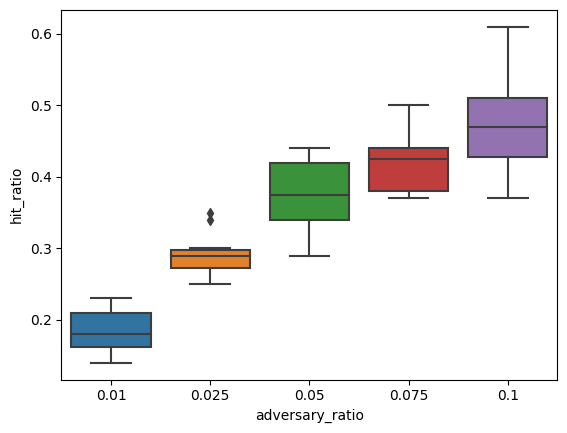

In [7]:
sns.boxplot(data=results_df, x="adversary_ratio", y="hit_ratio")